# Imports

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import pandas as pd

#viz
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from itertools import product
from wordcloud import WordCloud


#
#data preprocessing

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer

stop_words = set(stopwords.words("english"))

#
from sklearn.model_selection import train_test_split

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence
from sklearn.metrics import mean_absolute_error


Using TensorFlow backend.


# Data Viz

In [5]:
train=pd.read_csv('drive/My Drive/train.csv')
print(train.shape)
train.head()

(6079, 41)


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.000000,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,0.000000,0.666667,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.333333,0.333333,0.0,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com,0.888889,0.666667,0.666667,1.0,1.0,1.0,0.444444,0.444444,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [0]:
#add new column length of qst & answer
train['length_qst_answer']=[len(ch) for ch in train.question_body + train.question_title +  train.answer]

In [0]:
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [0]:
labels=['question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written']

In [0]:
len(labels)

30

In [0]:
for tag in labels:
    print('--------------------------- value counts of '+tag+'-----------------------------')
    print(train[tag].value_counts())

--------------------------- value counts of question_asker_intent_understanding-----------------------------
1.000000    2833
0.888889    1579
0.777778     883
0.666667     503
0.833333     108
0.333333      68
0.555556      60
0.500000      33
0.444444      12
Name: question_asker_intent_understanding, dtype: int64
--------------------------- value counts of question_body_critical-----------------------------
0.333333    1506
0.555556     932
0.444444     893
0.666667     845
0.777778     701
1.000000     583
0.888889     470
0.500000      94
0.833333      55
Name: question_body_critical, dtype: int64
--------------------------- value counts of question_conversational-----------------------------
0.000000    5409
0.333333     384
0.666667     152
1.000000     104
0.500000      30
Name: question_conversational, dtype: int64
--------------------------- value counts of question_expect_short_answer-----------------------------
1.000000    2936
0.666667    1373
0.000000     806
0.333333   

In [0]:
train[labels].describe()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,...,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,...,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,...,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,...,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


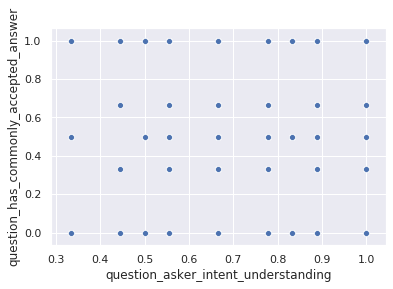

In [0]:

ax = sns.scatterplot(x=train.question_asker_intent_understanding, y=train.question_has_commonly_accepted_answer)

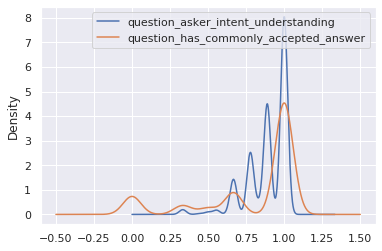

In [0]:
df = pd.DataFrame()
df['question_asker_intent_understanding']=train['question_asker_intent_understanding']
df['question_has_commonly_accepted_answer']=train['question_has_commonly_accepted_answer']
ax = df.plot.kde()

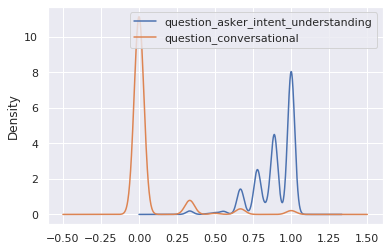

In [0]:
df = pd.DataFrame()
df['question_asker_intent_understanding']=train['question_asker_intent_understanding']
df['question_conversational']=train['question_conversational']
ax = df.plot.kde()

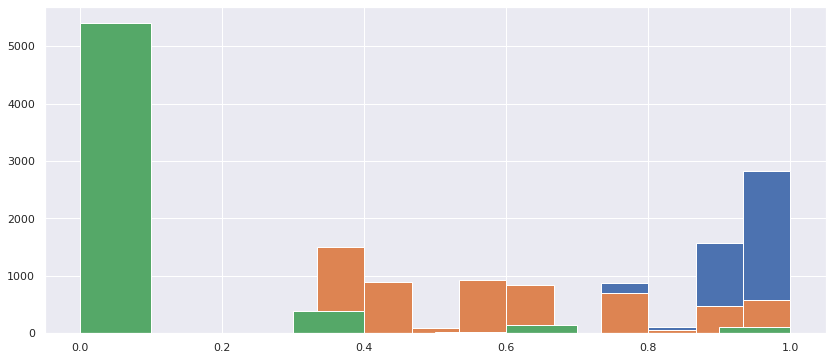

In [0]:
for i in labels[:3]:
    train[i].hist(figsize=[14,6])


<Figure size 14400x14400 with 0 Axes>

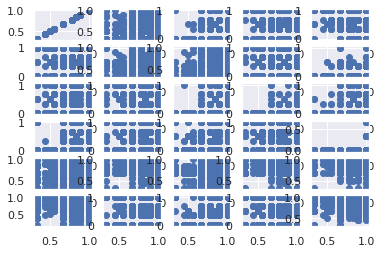

In [0]:
fig = plt.figure(figsize=(200,200))
fig, ax = plt.subplots(6, 5)
k=-1
num=0
couples=list(product([labels[num]],labels))
for i in range(6):
    for j in range(5):
        k+=1
        ax[i,j].plot(train[couples[k][0]],train[couples[k][1]],'bo')


<Figure size 14400x14400 with 0 Axes>

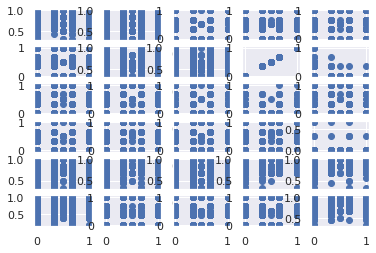

In [0]:
fig = plt.figure(figsize=(200,200))
fig, ax = plt.subplots(6, 5)
k=-1
num=8
couples=list(product([labels[num]],labels))
for i in range(6):
    for j in range(5):
        k+=1
        ax[i,j].plot(train[couples[k][0]],train[couples[k][1]],'bo')


<Figure size 1440x720 with 0 Axes>

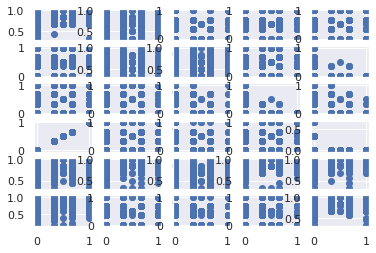

In [0]:
fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(6, 5)
k=-1
num=15
couples=list(product([labels[num]],labels))
for i in range(6):
    for j in range(5):
        k+=1
        ax[i,j].plot(train[couples[k][0]],train[couples[k][1]],'bo')


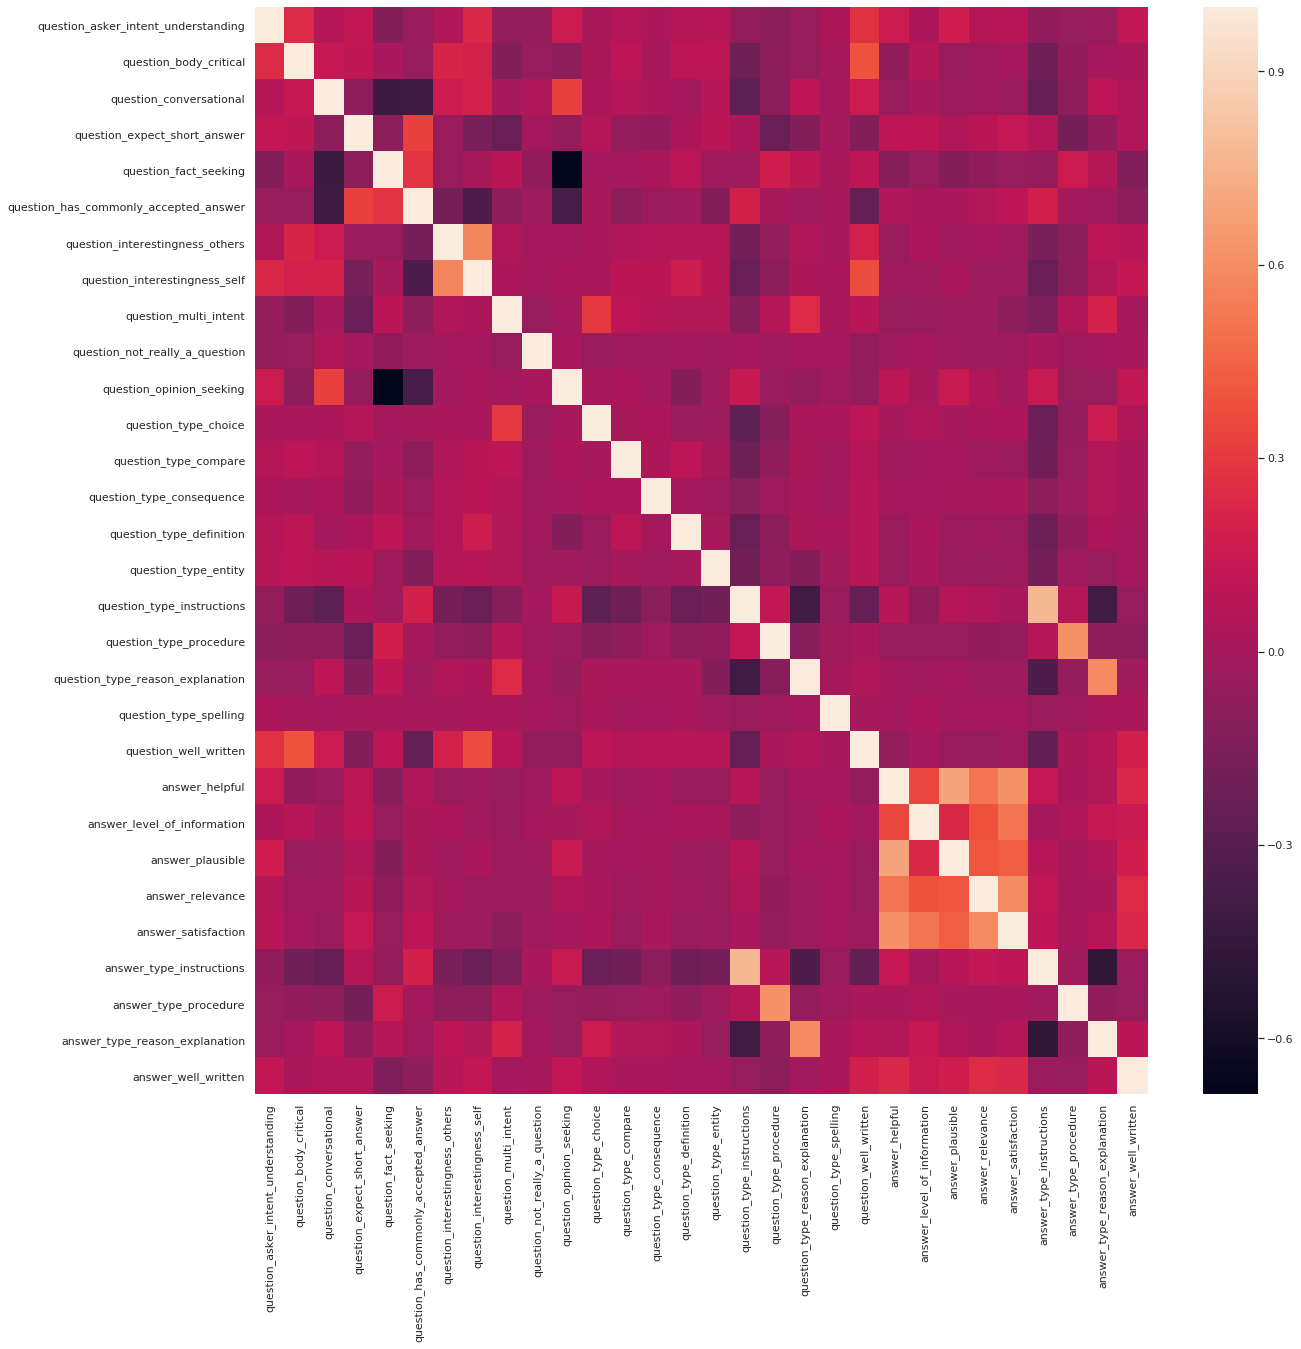

In [0]:
plt.rcParams['figure.figsize'] = (20, 20)

C=train[labels].corr()
sns.heatmap(C)

In [0]:
sorted(C['answer_plausible'])

[-0.12509308813292275,
 -0.05005000491891785,
 -0.044432457558766125,
 -0.04367762986912108,
 -0.03613774933416933,
 -0.03324865192616704,
 -0.03036860016680361,
 -0.028974219086232975,
 -0.018679491804982504,
 -0.014504236927401793,
 -0.002831857195951921,
 -0.0020777031179794797,
 0.004311951901163068,
 0.0060709363332785826,
 0.008537486217383459,
 0.010367535431744361,
 0.02827950287777982,
 0.029065267032300186,
 0.04510341189484026,
 0.048565895225539765,
 0.058387156830394846,
 0.07896567173783686,
 0.1456126205103848,
 0.173906109232512,
 0.18113517256784262,
 0.23461996417219727,
 0.4021468649900827,
 0.43229714956020865,
 0.6946007741902106,
 1.0]

### "answer_helpful" are correlated "answer_plausible"

In [0]:
sorted(C[labels[4]])

[-0.6864956198240194,
 -0.4120589951193031,
 -0.1458796998253239,
 -0.12509308813292275,
 -0.11998865936052013,
 -0.11310822725972429,
 -0.09080025169503719,
 -0.07883617627189803,
 -0.07235392510657848,
 -0.057832382057532786,
 -0.05285990975285941,
 -0.0499163175738219,
 -0.037800803556831165,
 -0.0192784663294414,
 -0.010088841278114888,
 -0.006419326653544647,
 -0.0046692816121186075,
 0.008593212399250693,
 0.01715552533481424,
 0.01834860344056184,
 0.025861257267864004,
 0.06652962284281512,
 0.08793352024182854,
 0.09467039092458698,
 0.1039966400611673,
 0.10522231378682786,
 0.15464619130722274,
 0.17954129987965065,
 0.27690595428046055,
 1.0]

### are correlated question_fact_seeking , question_opinion_seeking

In [0]:
sorted(C[labels[6]])

[-0.1832831912572617,
 -0.1803615626299065,
 -0.16301882853821845,
 -0.09048426975404793,
 -0.06532228313305029,
 -0.04685906061593586,
 -0.0382568883528908,
 -0.037800803556831165,
 -0.02745234630788138,
 -0.014504236927401793,
 -0.006037964665500481,
 -0.001221380667759696,
 0.003753354339447684,
 0.005888115509605443,
 0.018805645002910806,
 0.032855064317329014,
 0.03895073840781801,
 0.04198470737984021,
 0.04534590736293421,
 0.05047105480328495,
 0.061899016515970795,
 0.06276788399439148,
 0.07009286529982087,
 0.07533556228455479,
 0.09731967295632925,
 0.15794197530586193,
 0.189953349595784,
 0.2105052233283222,
 0.5721516493484903,
 1.0]

In [0]:
train['question_interestingness_self_updated']=train.question_interestingness_others-1

In [0]:
df=train[['question_interestingness_self_updated','question_interestingness_others']]
d=df.corr()
d

,question_interestingness_self_updated,question_interestingness_others
question_interestingness_self_updated,1.0,1.0
question_interestingness_others,1.0,1.0


### question_interestingness_self_updated & train.question_interestingness_others are correlated 

In [0]:
s=train.answer_plausible-train.answer_relevance

In [0]:
s.value_counts()

 0.000000    4488
-0.111111     451
 0.111111     428
-0.333333     131
-0.166667     118
-0.222222     102
 0.222222      85
 0.166667      61
 0.111111      56
-0.111111      42
 0.333333      29
-0.166667      21
 0.166667      17
-0.055556      14
-0.055556      10
 0.055556       6
-0.444444       4
 0.055556       3
-0.111111       2
-0.500000       2
-0.222222       1
-0.333333       1
 0.666667       1
 0.555556       1
-0.444444       1
 0.277778       1
 0.333333       1
 0.500000       1
-0.666667       1
dtype: int64

In [0]:
train.answer_relevance.value_counts()

1.000000    4913
0.888889     713
0.777778     184
0.833333     138
0.666667     111
0.555556       7
0.333333       5
0.500000       5
0.444444       3
Name: answer_relevance, dtype: int64

In [0]:
s=train.answer_plausible-train.answer_satisfaction
(s.value_counts())

 0.000000    1148
 0.066667    1102
 0.200000     861
 0.133333     821
 0.100000     284
             ... 
 0.088889       1
 0.533333       1
-0.122222       1
 0.555556       1
 0.366667       1
Length: 75, dtype: int64

### answer_satisfaction & answer plausible & answer_relevance & answer_helpful & answer_level_of_info are correlated

In [0]:
train.question_conversational.value_counts()

0.000000    5409
0.333333     384
0.666667     152
1.000000     104
0.500000      30
Name: question_conversational, dtype: int64

In [0]:
train.question_fact_seeking.value_counts()

1.000000    3480
0.666667    1326
0.333333     877
0.000000     315
0.500000      81
Name: question_fact_seeking, dtype: int64

In [0]:
s=train.question_fact_seeking-train.question_conversational
s.value_counts()

 1.000000    3360
 0.666667    1139
 0.333333     895
 0.000000     212
-0.333333     137
 0.666667      85
 0.500000      78
-1.000000      77
-0.666667      51
 0.333333      17
-0.500000      11
-0.333333       9
-0.666667       8
dtype: int64

### if fact_seek > 0.3 conversationel = 0

In [0]:
sorted(C[labels[29]])

[-0.1458796998253239,
 -0.0990826221990523,
 -0.08677293877357643,
 -0.05140028280146723,
 -0.048237836114686995,
 -0.038663819103422245,
 -0.01367158929486229,
 -0.0016280513462998503,
 0.004371241667837843,
 0.0051283650440729035,
 0.011294083505209126,
 0.012311315870976105,
 0.015077194719634765,
 0.021811778012561987,
 0.031499799332175324,
 0.04482670485869326,
 0.04559068121913192,
 0.047198097747652976,
 0.07533556228455479,
 0.08537586242824607,
 0.11509411661624643,
 0.11566936719038436,
 0.12014414717107194,
 0.14386026389984424,
 0.18113517256784262,
 0.18853076563793245,
 0.22710217385332557,
 0.2290638549908747,
 0.23712737494672897,
 1.0]

In [0]:
C[labels[29]]

question_asker_intent_understanding      0.115094
question_body_critical                   0.031500
question_conversational                  0.047198
question_expect_short_answer             0.044827
question_fact_seeking                   -0.145880
question_has_commonly_accepted_answer   -0.086773
question_interestingness_others          0.075336
question_interestingness_self            0.120144
question_multi_intent                    0.005128
question_not_really_a_question           0.011294
question_opinion_seeking                 0.115669
question_type_choice                     0.045591
question_type_compare                    0.015077
question_type_consequence                0.012311
question_type_definition                 0.004371
question_type_entity                    -0.001628
question_type_instructions              -0.048238
question_type_procedure                 -0.099083
question_type_reason_explanation        -0.013672
question_type_spelling                   0.021812


### Correlation between:
#### question_type_instructions & answer_type_instructions 
#### question_type_procedure & answer_type_procedure 
#### question_type_reason_explanation & answer_type_reason_explanation
#### question_opinion_seaking & answer_opinion_seaking 

In [0]:
train.length_qst_answer.value_counts()

877     10
988      9
638      9
718      8
1140     8
        ..
2860     1
1722     1
4911     1
1714     1
4106     1
Name: length_qst_answer, Length: 2762, dtype: int64

In [0]:
df=pd.DataFrame()
df['x']=new_data.question_expect_short_answer
df['y']=train.length_qst_answer
print(df.corr())
df=pd.DataFrame()
df['x']=new_data.question_multi_intent
df['y']=train.length_qst_answer
df.corr()

          x         y
x  1.000000 -0.134095
y -0.134095  1.000000


,x,y
x,1.00000,0.09326
y,0.09326,1.00000


In [0]:
train.describe()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written,length_qst_answer,question_interestingness_self_updated
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,4829.665899,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,...,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254,1726.467511,-0.412522
std,2789.689555,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,...,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708,1535.617746,0.135900
min,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,...,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333,89.000000,-0.666667
25%,2389.000000,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,...,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889,850.000000,-0.555556
50%,4847.000000,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,...,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889,1323.000000,-0.444444
75%,7222.000000,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,...,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000,2048.500000,-0.333333
max,9647.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23200.000000,0.000000


### Remove columns with 75% of values = 0 :
- qst_not_really_qst
- qst_type_spelling
- qst_type_entity
- qst_type_def
- qst_type_conseq

## Data distribution

In [0]:
new_data.host=train.host.apply(lambda x: x.split(".")[-2])

/home/abir/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[Text(0, 0, 'stackexchange'),
 Text(0, 0, 'stackoverflow'),
 Text(0, 0, 'superuser'),
 Text(0, 0, 'serverfault'),
 Text(0, 0, 'askubuntu'),
 Text(0, 0, 'mathoverflow')]

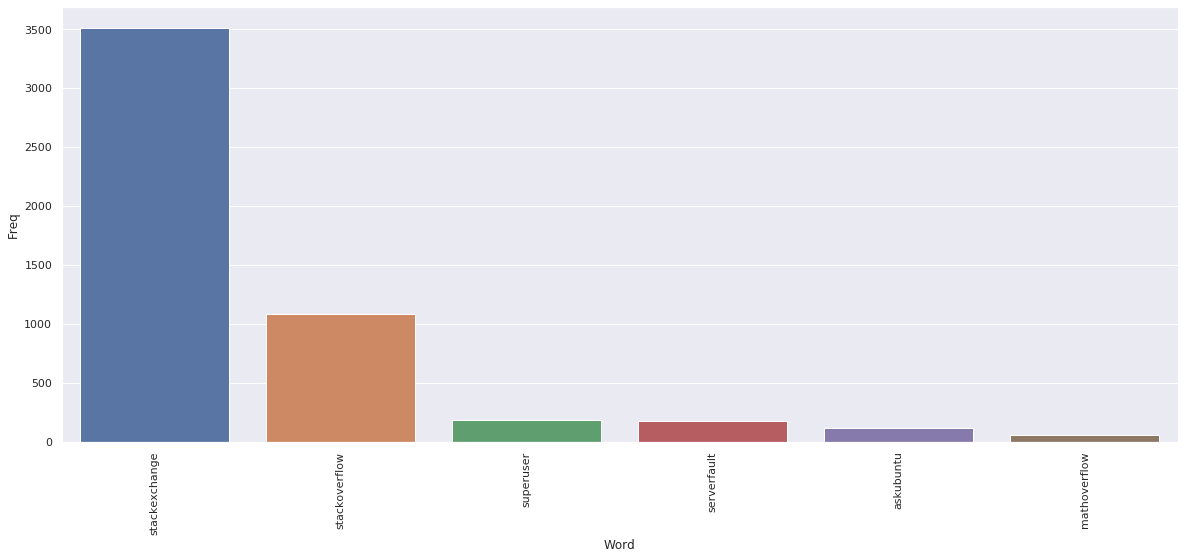

In [0]:
hosts=new_data.host[new_data.answer_helpful>0.8]


#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(hosts, n=106)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
sns.set(rc={'figure.figsize':(20,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'stackexchange'),
 Text(0, 0, 'stackoverflow'),
 Text(0, 0, 'superuser'),
 Text(0, 0, 'serverfault'),
 Text(0, 0, 'askubuntu'),
 Text(0, 0, 'mathoverflow')]

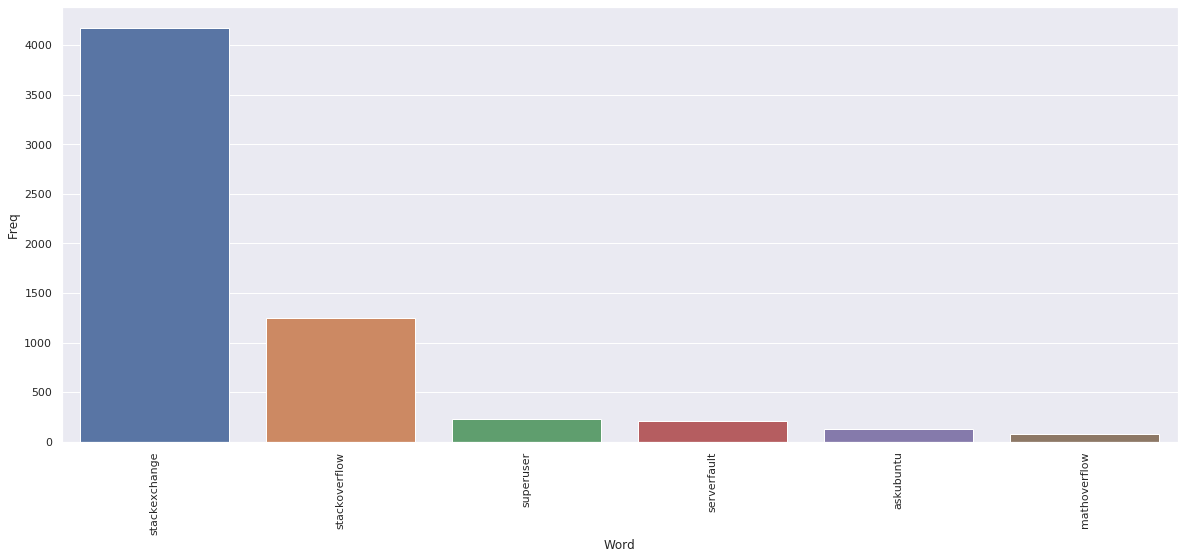

In [0]:
hosts=new_data.host
top_words = get_top_n_words(hosts, n=106)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

sns.set(rc={'figure.figsize':(20,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'gt'),
 Text(0, 0, 'lt'),
 Text(0, 0, 'use'),
 Text(0, 0, 'one'),
 Text(0, 0, 'would'),
 Text(0, 0, 'like'),
 Text(0, 0, 'get'),
 Text(0, 0, 'also'),
 Text(0, 0, 'need'),
 Text(0, 0, 'amp'),
 Text(0, 0, 'using'),
 Text(0, 0, 'time'),
 Text(0, 0, 'want'),
 Text(0, 0, 'could'),
 Text(0, 0, 'make'),
 Text(0, 0, 'see'),
 Text(0, 0, 'way'),
 Text(0, 0, 'may'),
 Text(0, 0, 'first'),
 Text(0, 0, 'code'),
 Text(0, 0, 'new'),
 Text(0, 0, 'file'),
 Text(0, 0, 'example'),
 Text(0, 0, 'end'),
 Text(0, 0, 'used'),
 Text(0, 0, 'two'),
 Text(0, 0, 'work'),
 Text(0, 0, 'set'),
 Text(0, 0, 'good'),
 Text(0, 0, 'data'),
 Text(0, 0, 'function'),
 Text(0, 0, 'even'),
 Text(0, 0, 'might'),
 Text(0, 0, 'think'),
 Text(0, 0, 'name'),
 Text(0, 0, 'http'),
 Text(0, 0, 'something'),
 Text(0, 0, 'right'),
 Text(0, 0, 'much'),
 Text(0, 0, 'class'),
 Text(0, 0, 'different'),
 Text(0, 0, 'know'),
 Text(0, 0, 'case'),
 Text(0, 0, 'well'),
 Text(0, 0, 'try'),
 Text(0, 0, 'system'),
 Text(0, 0, 'value'),
 

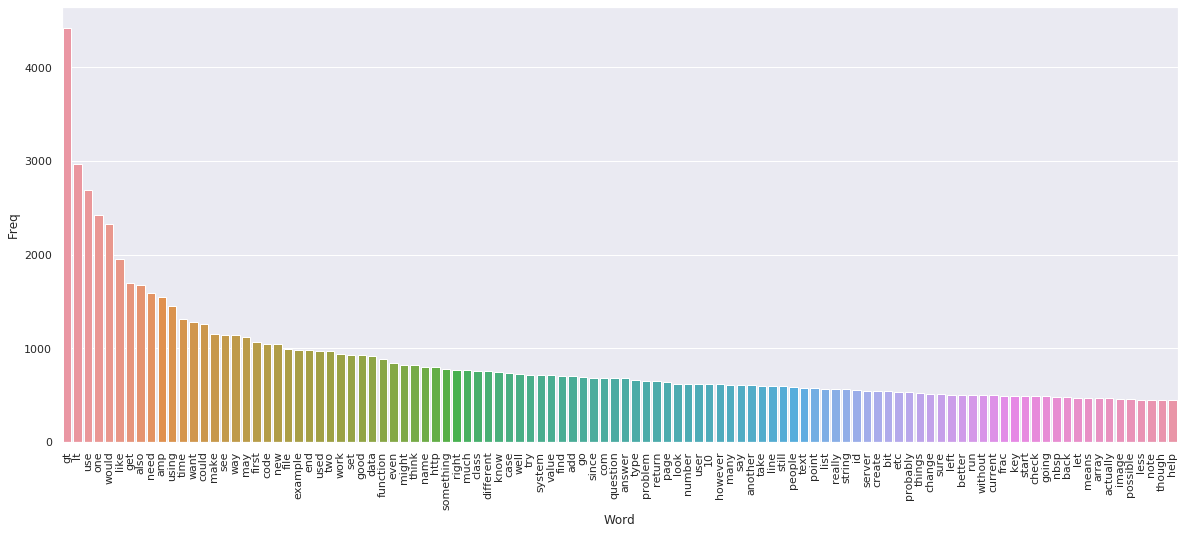

In [0]:
hosts=new_data.answer[new_data.answer_helpful>0.5]
top_words = get_top_n_words(hosts, n=106)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

sns.set(rc={'figure.figsize':(20,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

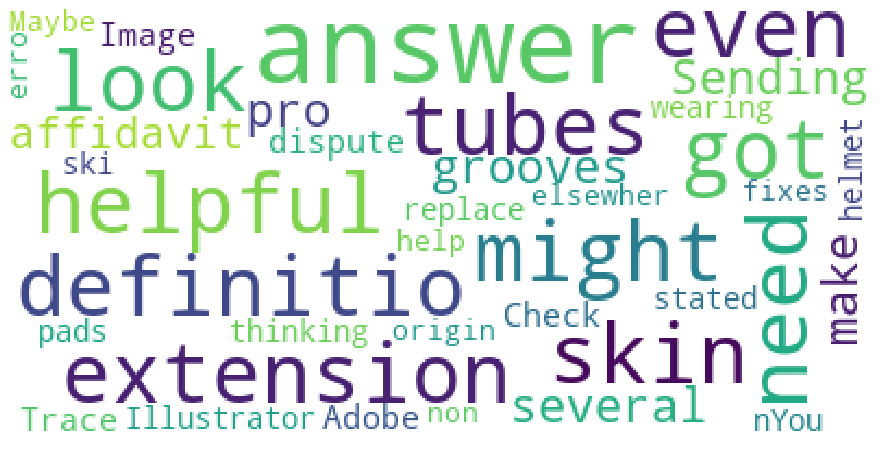

In [0]:
wordcloud = WordCloud(
                          background_color='white',
                          min_font_size=10,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         )
fig = plt.figure(1)
plt.imshow(wordcloud.generate (str(hosts)))
plt.axis('off')
plt.show()

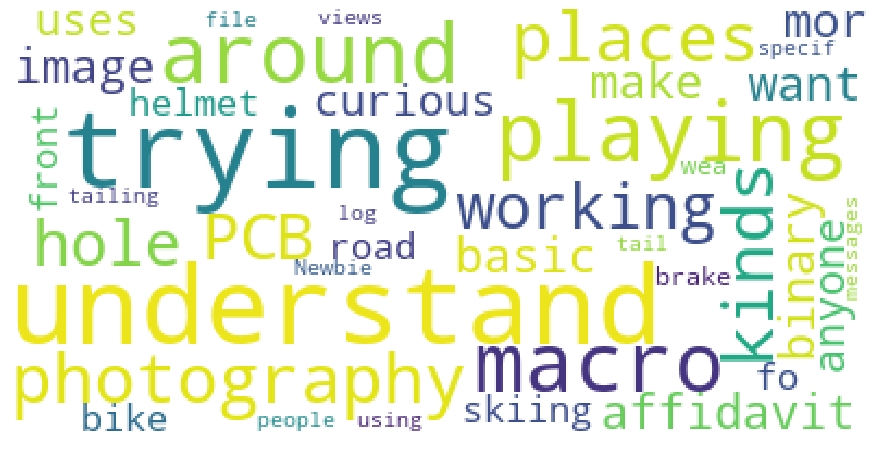

In [0]:
hosts=new_data.question_body[new_data.answer_helpful>0.5]
fig = plt.figure(1)
plt.imshow(wordcloud.generate (str(hosts)))
plt.axis('off')
plt.show()

[Text(0, 0, 'gt'),
 Text(0, 0, 'lt'),
 Text(0, 0, 'would'),
 Text(0, 0, 'like'),
 Text(0, 0, 'one'),
 Text(0, 0, 'get'),
 Text(0, 0, 'using'),
 Text(0, 0, 'use'),
 Text(0, 0, 'new'),
 Text(0, 0, 'want'),
 Text(0, 0, 'way'),
 Text(0, 0, 'know'),
 Text(0, 0, 'code'),
 Text(0, 0, 'time'),
 Text(0, 0, 'class'),
 Text(0, 0, 'file'),
 Text(0, 0, 'question'),
 Text(0, 0, 'amp'),
 Text(0, 0, 'data'),
 Text(0, 0, 'need'),
 Text(0, 0, 'could'),
 Text(0, 0, 'id'),
 Text(0, 0, 'com'),
 Text(0, 0, 'http'),
 Text(0, 0, 'set'),
 Text(0, 0, 'work'),
 Text(0, 0, '10'),
 Text(0, 0, 'user'),
 Text(0, 0, 'also'),
 Text(0, 0, 'make'),
 Text(0, 0, 'name'),
 Text(0, 0, 'function'),
 Text(0, 0, 'example'),
 Text(0, 0, 'find'),
 Text(0, 0, 'two'),
 Text(0, 0, 'server'),
 Text(0, 0, 'error'),
 Text(0, 0, 'end'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'string'),
 Text(0, 0, 'java'),
 Text(0, 0, 'text'),
 Text(0, 0, 'return'),
 Text(0, 0, 'first'),
 Text(0, 0, 'int'),
 Text(0, 0, 'right'),
 Text(0, 0, 'page'),
 Text

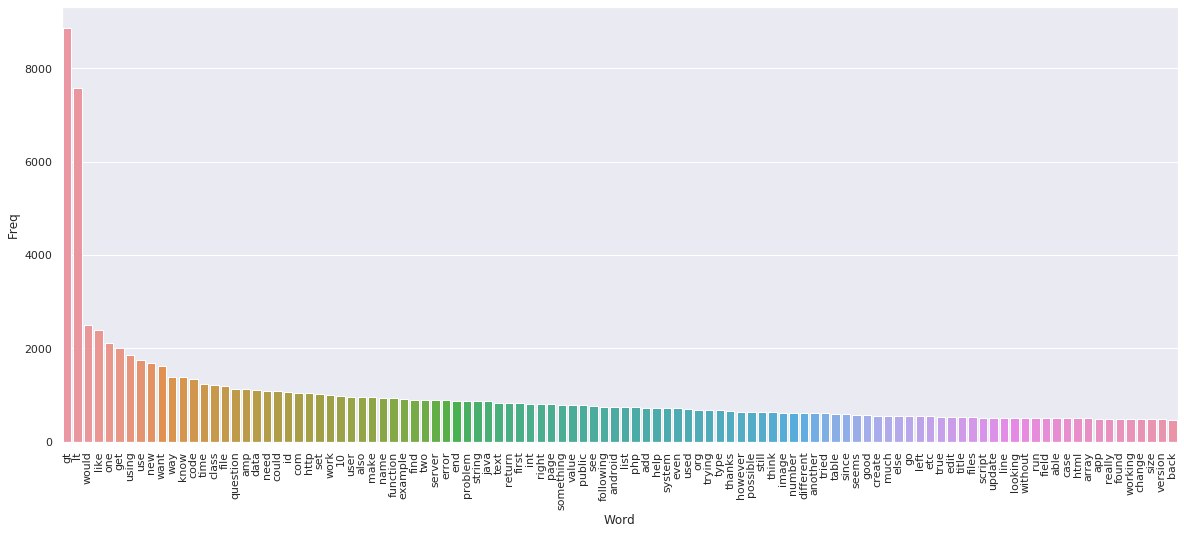

In [0]:
top_words = get_top_n_words(hosts, n=106)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

sns.set(rc={'figure.figsize':(20,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Feature selection

In [6]:
new_labels=['question_asker_intent_understanding',
       'question_body_critical',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others',
       'question_multi_intent','question_type_choice',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation',
       'question_well_written', 'answer_helpful',
       'answer_well_written']
len(new_labels)
features=['question_title', 'question_body', 'answer', 'category', 'host']
features.extend(new_labels)
new_data=train[features]
print(train.shape)
print(new_data.shape)

(6079, 41)
(6079, 19)


In [7]:
new_data.head()

,question_title,question_body,answer,category,host,question_asker_intent_understanding,question_body_critical,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_multi_intent,question_type_choice,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_well_written,answer_helpful,answer_well_written
0,What am I losing when using extension tubes in...,After playing around with macro photography on...,"I just got extension tubes, so here's the skin...",LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000
1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,It might be helpful to look into the definitio...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.5,1.0,1.0,0.444444,0.666667,0.666667,0.0,0.000000,0.333333,0.888889,0.888889,0.888889
2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Do you even need grooves? We make several pro...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,1.0,1.0,1.0,0.666667,0.333333,0.000000,1.0,0.333333,0.333333,0.777778,0.777778,0.888889
3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...","Sending an ""affidavit"" it is a dispute between...",CULTURE,judaism.stackexchange.com,0.888889,0.666667,1.0,1.0,1.0,0.444444,0.000000,1.000000,0.0,0.000000,0.000000,0.888889,0.833333,1.000000
4,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,Check out Image Trace in Adobe Illustrator. \n...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,1.0,1.0,1.0,0.666667,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000


# Data cleaning

In [0]:
#text processing function , will be used to clean the whole data 
def text_preprocessing(tClean):
    #remove whitespaces
    tClean=re.sub('\n+| +',' ',tClean)
    #remove punctuations, symbols and digits
    tClean=re.sub('(\\d|\\W)+',' ',tClean)
    #change to lowercase
    tClean=tClean.lower()
    #remove stopwords & lemmatizing
    lNoStopWords=[]
    lem=WordNetLemmatizer()
    lNoStopWords=[lem.lemmatize(word,pos='v') for word in tClean.split() if word not in stop_words]
    #remove alphabets
    tClean=' '.join([word for word in lNoStopWords if len(word)>1])    
    return tClean

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [10]:
new_data["question_body"]=new_data.question_body.apply(lambda x: text_preprocessing(x))
new_data["question_title"]=new_data.question_title.apply(lambda x: text_preprocessing(x))
new_data['answer']=new_data.answer.apply(lambda x: text_preprocessing(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# Keras embedding layer + NN

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
'''

need to find no of unique words. this will be taken by the keras embedding layer as 'input_dim' parameter.

'''
new_data['post']=new_data.question_title+new_data.question_body+new_data.answer+new_data.host+new_data.category

master=[]
for e in new_data['post']:
    master.append(e)

words=[]
for review in master:
    tok=review.split()
    for r in tok:
        words.append(r)
    
    
print(len(set(words)))
  
vocab_size=len(set(words))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


55825


In [13]:
tokenizer=Tokenizer(num_words=vocab_size)   # see the other notebook named 'keras tokenizer'
a=tokenizer.fit_on_texts(list(new_data.post))
encoded_train=tokenizer.texts_to_sequences(list(new_data.post))

maxi=-1
for str in new_data.post :
    tokens=nltk.word_tokenize(str)
    if(maxi<len((tokens))):
        maxi=len(tokens)
    
print(maxi)

2214


In [14]:
max_doc_len=maxi
pad_encoded_train=pad_sequences(encoded_train,max_doc_len)
print(pad_encoded_train.shape)

vocab_size=vocab_size
embed_size=100
max_doc_len=maxi

(6079, 2214)


In [16]:
labels=['question_asker_intent_understanding', 'question_body_critical',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_multi_intent',
       'question_type_choice', 'question_type_instructions',
       'question_type_procedure', 'question_type_reason_explanation',
       'question_well_written', 'answer_helpful', 'answer_well_written']

batch_size=1024  
epochs=2
models=[]
for i in range(len(labels)):
  print("========================================= Fitting model",labels[i],"==================================================")
  word_input=Input(shape=(max_doc_len,),dtype='float64')  # shape of input. each document has 1416 element or words
  word_embedding=Embedding(input_dim=vocab_size,output_dim=embed_size,input_length=max_doc_len)(word_input) # creating the embedding
  word_vec=Flatten()(word_embedding) # flatten
  word_vec=Dense(32,activation='relu')(word_vec)
  word_vec=Dense(1,activation='sigmoid')(word_vec)  # binary classification
  embed_model =Model([word_input],word_vec) # combining all into a Keras model

  embed_model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),loss='mean_absolute_error',metrics=['mae'])
  embed_model.summary() 
  # splitting into train and val sets.
  x_train,x_test,y_train,y_test=train_test_split(pad_encoded_train,new_data[labels[i]],test_size=0.20,random_state=42)
  embed_model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test)) # fitting on train and validating on val sets.
  models.append(embed_model)

========================================= Fitting model question_asker_intent_understanding ==================================================
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2214)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 2214, 100)         5582500   
_________________________________________________________________
flatten_2 (Flatten)          (None, 221400)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                7084832   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,667,365
Trainable params: 12,667,365
Non-trainable params: 0
____________________________________

# Make predictions

In [0]:
x_t,x_te,y_t,y_t=train_test_split(new_data[['question_title','question_body','answer']],new_data[-2nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn],test_size=0.20,random_state=42)
import numpy as np

df=pd.DataFrame()
df[['question_title','question_body','answer']]=x_te
j=0
for i in labels:
  df[i]=models[j].predict(x_test)
  j+=1


In [19]:
df.head(100)

,question_title,question_body,answer,question_asker_intent_understanding,question_body_critical,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_multi_intent,question_type_choice,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_well_written,answer_helpful,answer_well_written
3320,simple particle filter algorithm sequential mo...,interest simple algorithm particles filter giv...,sentence mean generate x_t distribution x_t al...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.994217,0.0,0.0,1.0,1.0,1.0
296,benefit own physical book,see question update amp th edition book get th...,ebook find comfortable linear read physical bo...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.992452,0.0,0.0,1.0,1.0,1.0
346,fish spot surround rock etc actually increase ...,talk fisher guy fish hut tell best place fish ...,yes fish small tile water wall shore rock thre...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.994201,0.0,0.0,1.0,1.0,1.0
5001,latex command double lower index summation,would like know latex command include double l...,try use substack usepackage amsmath begin equa...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.994182,0.0,0.0,1.0,1.0,1.0
544,tell macmini stop boot windows macbook pro,need able control mac mini without screen thin...,system store boot choice nvram might reset pow...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.994220,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,spring security access controller method base ...,configure spring security across controllers w...,one approach use handler interceptor general i...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.994028,0.0,0.0,1.0,1.0,1.0
4764,exactly difference selberg class set artin fun...,question title read answer another question ar...,far know precise conjecture ask elements selbe...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.994258,0.0,0.0,1.0,1.0,1.0
5933,inspector mean hot neutral separate,inspection report house inspector say hot neut...,guess image sub panel case inspector correct n...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.992234,0.0,0.0,1.0,1.0,1.0
800,cv complete,career fill cv list complete could someone tell,intentional indicate go extra mile beyond mini...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.993865,0.0,0.0,1.0,1.0,1.0


In [24]:
df.question_body_critical.value_counts()

1.000000    1212
1.000000       1
0.999973       1
0.996834       1
1.000000       1
Name: question_body_critical, dtype: int64


## Our neural network is not doing well on our small dataset. He is always predicting the majority class(in the training data).

